In [30]:
# 数据读取
import pandas as pd
df = pd.read_csv('titanic.csv',index_col=0) 
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
#显示数据信息
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
#查看缺失值
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

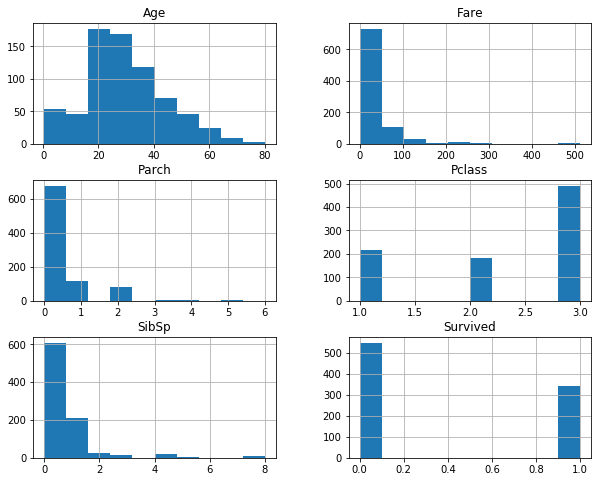

In [33]:
# 查看数据分布
import matplotlib.pyplot as plt 
df.hist(figsize=(10,8)) 
plt.show()

In [34]:
#去除多余属性
df = df.drop(['Name','Ticket','Cabin'],axis=1) 
df.columns



Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [35]:
#设置age缺失值
mean_age = df['Age'].mean() 
tmp = df['Age'].copy() 
tmp[df.Age.isnull()] = mean_age 
df['Age_fill'] = tmp
del tmp
df = df.drop(['Age'],axis=1) 
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age_fill'],
      dtype='object')

In [39]:
#将离散变量转化为编码
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df_sex = le.fit(df['Sex'])
df['Sex'] = df_sex.transform(df['Sex'])
df = df.dropna()
df_embarked = le.fit(df['Embarked'])
df['Embarked'] = df_embarked.transform(df['Embarked']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null int64
Age_fill    889 non-null float64
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [40]:
X = df.loc[:,df.columns!='Survived']
y = df.loc[:,df.columns=='Survived']

In [41]:
from sklearn.model_selection import train_test_split 
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y) 
X_tr.shape,X_ts.shape

((666, 7), (223, 7))

In [42]:
#分别使用决策树模型与Bagging模型建模
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
dtc = DecisionTreeClassifier()
bgc = BaggingClassifier(base_estimator=dtc,n_estimators=100)  #Bagging模型
dtc = dtc.fit(X_tr,y_tr)
bgc = bgc.fit(X_tr,y_tr.values.ravel())

In [43]:
y_dtc_pred = dtc.predict(X_ts)
y_bgc_pred = bgc.predict(X_ts)
from sklearn.metrics import f1_score,accuracy_score 
print('f1-score:%.4f'%f1_score(y_ts,y_dtc_pred)) 
print('accuracy:%.4f \n'%accuracy_score(y_ts,y_dtc_pred)) 
print('f1-score:%.4f'%f1_score(y_ts,y_bgc_pred)) 
print('accuracy:%.4f'%accuracy_score(y_ts,y_bgc_pred))

f1-score:0.6936
accuracy:0.7623 

f1-score:0.7753
accuracy:0.8206


In [46]:
from sklearn.model_selection import cross_val_score 
cross_val_score(dtc,X,y,scoring='f1',cv=5).mean()

0.6999612883952259

In [48]:
#Bagging模型优化后的结果
cross_val_score(bgc,X,y.values.ravel(),scoring='f1',cv=5).mean()

0.7533350249827562

# 使用了Bagging模型进行数据优化
# 准确率相比单决策树有了明显的提高